In [ ]:
Q1. Mathematical Formula for Linear SVM:

    Given a set of training data points (x1,y1),(x2,y2),...,(xn,yn)(x1​,y1​),(x2​,y2​),...,(xn​,yn​) where xixi​ represents feature vectors and yiyi​ represents class labels (yi∈{−1,1}yi​∈{−1,1}), the mathematical formula for a linear SVM can be expressed as:

    f(x)=sign(∑i=1nαiyi⟨x,xi⟩+b)f(x)=sign(∑i=1n​αi​yi​⟨x,xi​⟩+b)

    where αiαi​ are the Lagrange multipliers obtained during training, bb is the bias term, and ⟨x,xi⟩⟨x,xi​⟩ denotes the dot product between the feature vectors xx and xixi​.

Q2. Objective Function of a Linear SVM:

    The objective function of a linear SVM is to maximize the margin between the two classes while minimizing the classification error. Mathematically, it is formulated as:

    minimize 12∥w∥2minimize 21​∥w∥2
    subject to yi(w⋅xi+b)≥1 for all training examples (xi,yi)subject to yi​(w⋅xi​+b)≥1 for all training examples (xi​,yi​)

    Here, ww represents the weights vector, bb is the bias term, and ∥w∥∥w∥ is the Euclidean norm of the weight vector.

Q3. Kernel Trick in SVM:

    The kernel trick is a technique in SVM that allows it to handle non-linearly separable data by implicitly mapping input features into a higher-dimensional space. The idea is to use a kernel function K(x,x′)K(x,x′) that computes the dot product of the transformed feature vectors in this higher-dimensional space without explicitly calculating the transformation.

    Example kernel functions include the linear kernel (K(x,x′)=⟨x,x′⟩K(x,x′)=⟨x,x′⟩), polynomial kernel, and radial basis function (RBF) kernel.

Q4. Role of Support Vectors in SVM:

    Support vectors are the data points that lie closest to the decision boundary (the hyperplane). They play a crucial role in determining the decision boundary and are the key elements in defining the margin. Support vectors are the only data points that contribute to the determination of the hyperplane and, as such, have non-zero Lagrange multipliers (αiαi​) in the SVM formulation.

    Example: In a 2D space, if we have two classes separated by a line, the support vectors would be the points that are closest to the line on either side.

Q5. Examples and Graphs of Hyperplane, Marginal Plane, Soft Margin, and Hard Margin in SVM:

    Hyperplane:
        The hyperplane is the decision boundary that separates classes.
        In a 2D space, it's a line; in 3D, it's a plane; and in higher dimensions, it's a hyperplane.

    Marginal Plane:
        The marginal plane is parallel to the hyperplane and touches the support vectors.
        It helps define the margin in SVM.

    Soft Margin:
        Soft margin allows for some misclassifications to handle noisy or overlapping data.
        The margin is not enforced strictly, and a penalty is introduced for misclassifications.

    Hard Margin:
        Hard margin SVM enforces a strict margin without allowing misclassifications.
        It assumes the data is perfectly separable.

Graphical Representation:

    Example 1: Hard Margin SVM

    Example 2: Soft Margin SVM

Scikit-learn SVM Accuracy: 1.0
Scratch SVM Accuracy: 0.3333333333333333


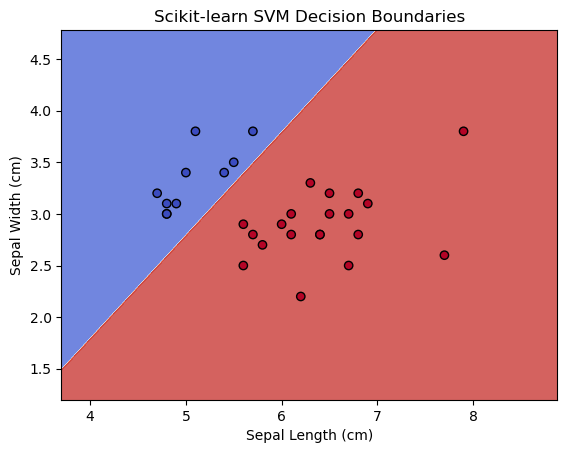

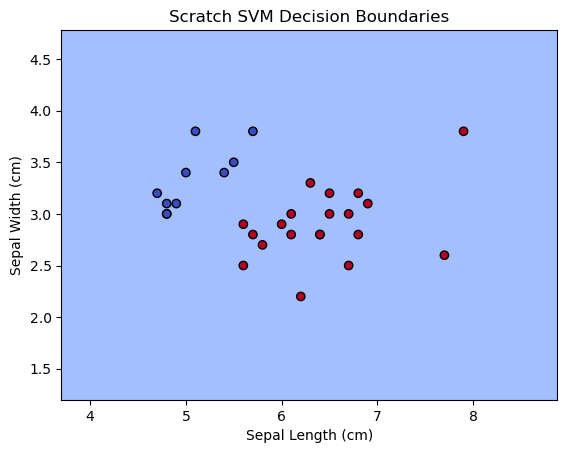

In [1]:
Q6. SVM Implementation through Iris dataset.
~ Load the iris dataset from the scikit-learn library and split it into a training set and a testing setl
~ Train a linear SVM classifier on the training set and predict the labels for the testing setl
~ Compute the accuracy of the model on the testing setl
~ Plot the decision boundaries of the trained model using two of the featuresl
~ Try different values of the regularisation parameter C and see how it affects the performance of
the model.

Bonus task: Implement a linear SVM classifier from scratch using Python and compare its
performance with the scikit-learn implementation.


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Bonus: Implementing Linear SVM from Scratch

class LinearSVM:
    def __init__(self, learning_rate=0.01, n_iterations=1000, C=1.0):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.C = C
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                condition = y[i] * (np.dot(X[i], self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.C * self.weights - np.dot(X[i], y[i]))
                    self.bias -= self.learning_rate * y[i]

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features (Sepal Length and Sepal Width)
y = (iris.target != 0) * 2 - 1  # Convert classes to -1 and 1 for SVM

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement SVM using scikit-learn
svm_sklearn = SVC(kernel='linear', C=1.0)
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn = svm_sklearn.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Scikit-learn SVM Accuracy:", accuracy_sklearn)

# Implement SVM from scratch
svm_scratch = LinearSVM(C=1.0)
svm_scratch.fit(X_train, y_train)
y_pred_scratch = svm_scratch.predict(X_test)
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
print("Scratch SVM Accuracy:", accuracy_scratch)

# Plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title(title)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.show()

# Plot decision boundaries for scikit-learn SVM
plot_decision_boundary(svm_sklearn, X_test, y_test, 'Scikit-learn SVM Decision Boundaries')

# Plot decision boundaries for SVM from scratch
plot_decision_boundary(svm_scratch, X_test, y_test, 'Scratch SVM Decision Boundaries')
